In [122]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [17]:
sns.set(rc={'figure.figsize':(12,12)})

In [ ]:
'''
На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – 
помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:
Выберите метод, который предположительно подойдет в первом вопросе.
Проверьте, являются ли дисперсии внутри групп гомогенными.
Проведите тест на нормальность распределения.
Сравните средние в представленных группах.
Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
Примите решение: какие картинки в итоге будем использовать?
Выберите метод для второго теста.
Визуализируйте распределение events для контрольной и тестовой групп. 
Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
- 11.Выберите формулу для модели, проведите тест.
'''

In [2]:
df = pd.read_csv('/Users/ruslanhuretski/Documents/karpov.cources/Statistics/5_task_1.csv')

In [3]:
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
df.shape

(30000, 3)

In [8]:
df.group.value_counts()

A    10000
B    10000
C    10000
Name: group, dtype: int64

In [10]:
df_A = df.query('group == "A"')
df_B = df.query('group == "B"')
df_C = df.query('group == "C"')

In [ ]:
# Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.
# - Как проверять гомогенность дисперсий?
# С помощью функции `scipy.stats.levene()` . Туда нужно подать три отдельных массива, в каждом из которых отдельная группа.   
# Какова нулевая гипотеза теста Левена?
# Что дисперсии гомогенны. Соответственно, альтернативная гипотеза - дисперсии гетерогенны (различаются).

In [12]:
stats.levene(df_A.events, df_B.events, df_C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
"""
Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность 
обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. 
Для воспроизводимости результата используйте параметр random_state=17 в методе sample.
"""

In [32]:
df_A.events.sample(1000, random_state=17)

2688    48
233     51
9099    53
8652    29
2842    34
        ..
4536    33
7441    20
6372    42
1945    27
9493    28
Name: events, Length: 1000, dtype: int64

In [38]:
stats.shapiro(df_A.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [39]:
stats.shapiro(df_B.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [40]:
stats.shapiro(df_C.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [28]:
# Построим дисплоты

<AxesSubplot:xlabel='events'>

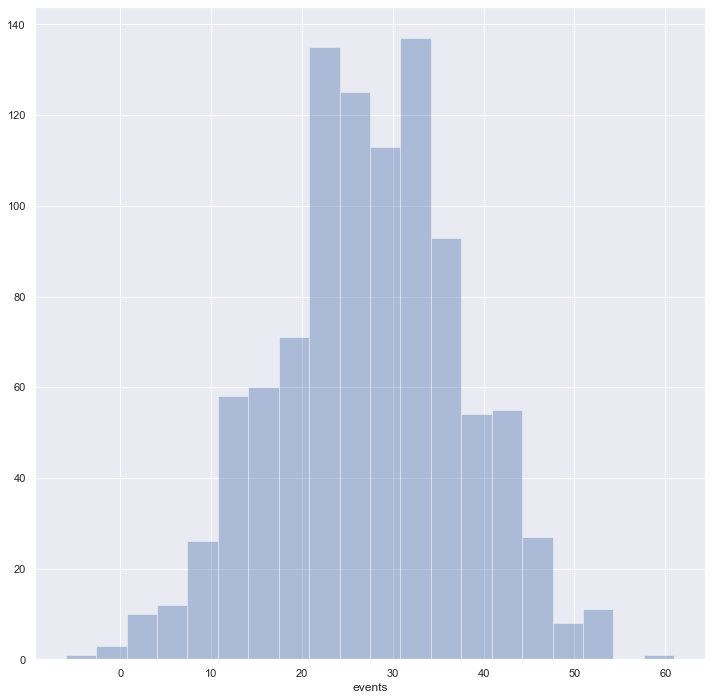

In [49]:
sns.distplot(df_C.events.sample(1000, random_state=17), kde=False, bins=20)

<AxesSubplot:xlabel='events'>

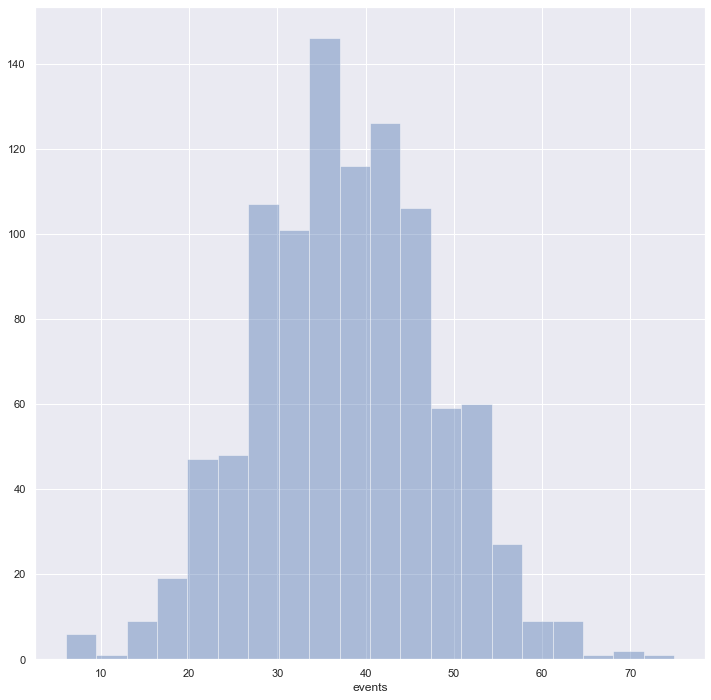

In [45]:
sns.distplot(df_B.events.sample(1000, random_state=17), kde=False, bins=20)

<AxesSubplot:xlabel='events'>

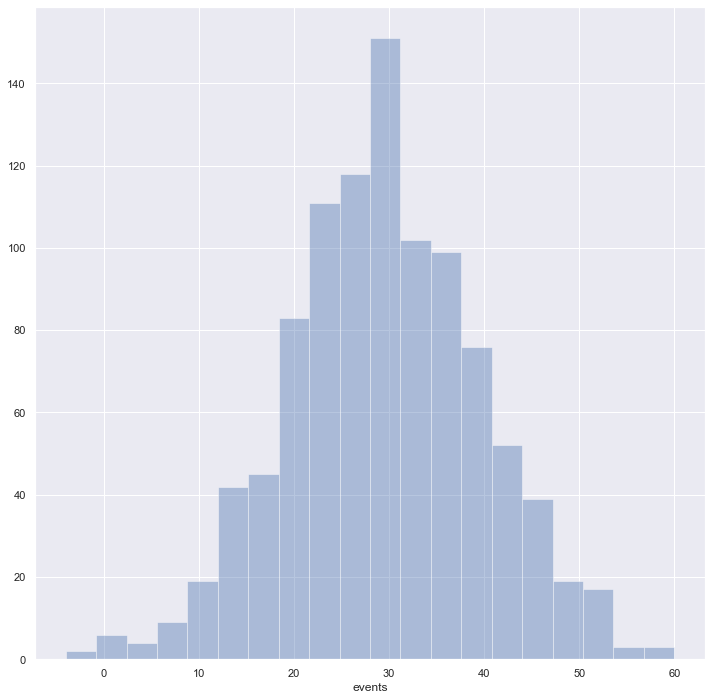

In [47]:
sns.distplot(df_A.events.sample(1000, random_state=17), kde=False, bins=20)

In [51]:
stats.f_oneway(df_A.events, df_B.events, df_C.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [ ]:
'''
Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (F_ONEWAY) . 
Значение статистики равно (окр. до целого) 2886 , а р-уровень значимости составил 0 .
Значит есть есть статистически значимые различия между группами
Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
'''

In [53]:
print(pairwise_tukeyhsd(df.events, df.group))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [ ]:
'''
Как видно по последней колонке, все нулевые гипотезы были отклонены, поэтому мы делаем вывод, что средние всех трёх групп 
значимо различаются.
'''

In [ ]:
# Так какие картинки в итоге будем использовать?
# Ответ B

In [57]:
df.groupby('group', as_index=False).agg({'events': sum})

,group,events
0,A,295796
1,B,376136
2,C,274703


In [58]:
df_A.events.describe()

count    10000.000000
mean        29.579600
std         10.079376
min         -6.000000
25%         23.000000
50%         30.000000
75%         36.000000
max         63.000000
Name: events, dtype: float64

In [59]:
df_B.events.describe()

count    10000.00000
mean        37.61360
std          9.84836
min          0.00000
25%         31.00000
50%         38.00000
75%         44.00000
max         75.00000
Name: events, dtype: float64

In [60]:
df_C.events.describe()

count    10000.000000
mean        27.470300
std          9.959048
min         -7.000000
25%         21.000000
50%         27.000000
75%         34.000000
max         62.000000
Name: events, dtype: float64

In [ ]:
'''
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой 
по сегменту клиента.
Какой метод скорее всего пригодится в данном случае?

'''

In [61]:
df1 = pd.read_csv('/Users/ruslanhuretski/Documents/karpov.cources/Statistics/5_task_2.csv')

In [62]:
df1.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [ ]:
'''
Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. 
Соотнесите графики распределения и экспериментальные группы:
'''

In [65]:
df1_test = df1.query('group == "test"')
df1_control = df1.query('group == "control"')

<AxesSubplot:xlabel='events'>

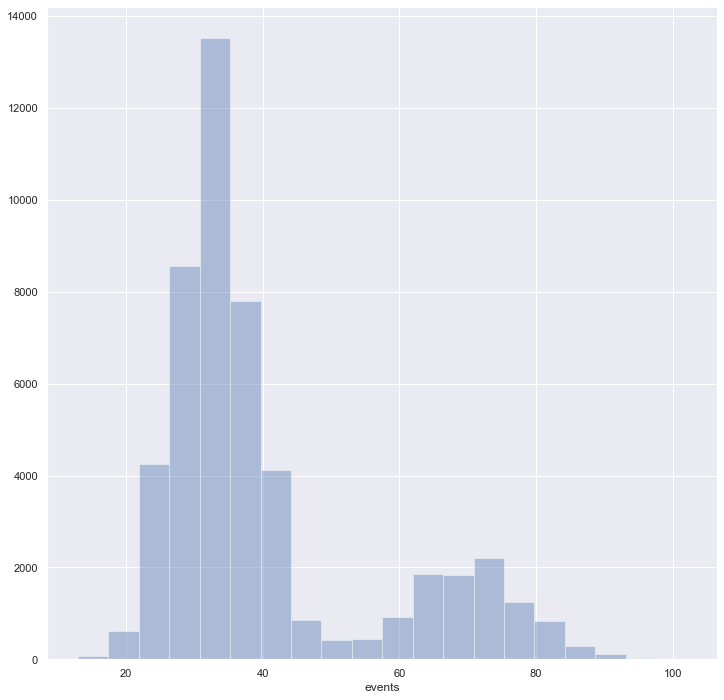

In [68]:
sns.distplot(df1_test.events, kde=False, bins=20)

<AxesSubplot:xlabel='events'>

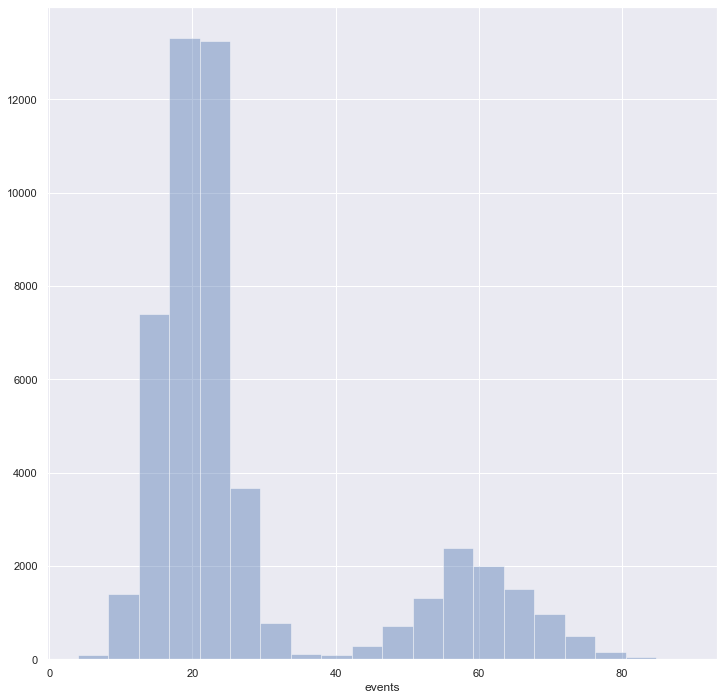

In [70]:
sns.distplot(df1_control.events, kde=False, bins=20)

In [ ]:
'''
Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью 
до 2 знаков после точки.
'''

In [79]:
df1_test_low = df1_test.query('segment == "low"')
df1_test_high = df1_test.query('segment == "high"')
df1_control_low = df1_control.query('segment == "low"')
df1_control_high = df1_control.query('segment == "high"')

In [80]:
df1_test_low.events.describe()

count    40000.000000
mean        33.025925
std          5.720845
min         13.000000
25%         29.000000
50%         33.000000
75%         37.000000
max         59.000000
Name: events, dtype: float64

In [81]:
df1_test_high.events.describe()

count    10000.000000
mean        69.938500
std          8.403974
min         40.000000
25%         64.000000
50%         70.000000
75%         76.000000
max        102.000000
Name: events, dtype: float64

In [82]:
df1_control_low.events.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

In [83]:
df1_control_high.events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [ ]:
'''
Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment 
в combination, чтобы потом передать в аргумент groups в MultiComparison:

+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+
Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

Note:  При интерпретации обратите внимание на то, какая из групп с какой сравнивается и как считается meandiff.
'''

In [134]:
stats.levene(df1_test_low.events, df1_test_high.events, df1_control_low.events, df1_control_high.events)

LeveneResult(statistic=2983.609682903818, pvalue=0.0)

In [98]:
formula = 'events ~ segment + group + segment:group'

In [99]:
model = ols(formula, df1).fit()

In [100]:
aov_table = anova_lm(model, typ=2)

In [101]:
aov_table

,sum_sq,df,F,PR(>F)
df1.segment,2.362480e+07,1.0,689756.377485,0.000000e+00
df1.group,3.837195e+06,1.0,112031.864119,0.000000e+00
df1.segment:df1.group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [116]:
df1['combination'] = df1.group + ' / ' + df1.segment

In [117]:
df1.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [118]:
print(pairwise_tukeyhsd(df1.events, df1.combination))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2   meandiff p-adj  lower    upper   reject
--------------------------------------------------------------
controlhigh controllow -39.9392 0.001 -40.1073 -39.7711   True
controlhigh   testhigh   9.9677 0.001   9.7551  10.1803   True
controlhigh    testlow -26.9449 0.001  -27.113 -26.7768   True
 controllow   testhigh  49.9069 0.001  49.7388   50.075   True
 controllow    testlow  12.9944 0.001   12.888  13.1007   True
   testhigh    testlow -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------


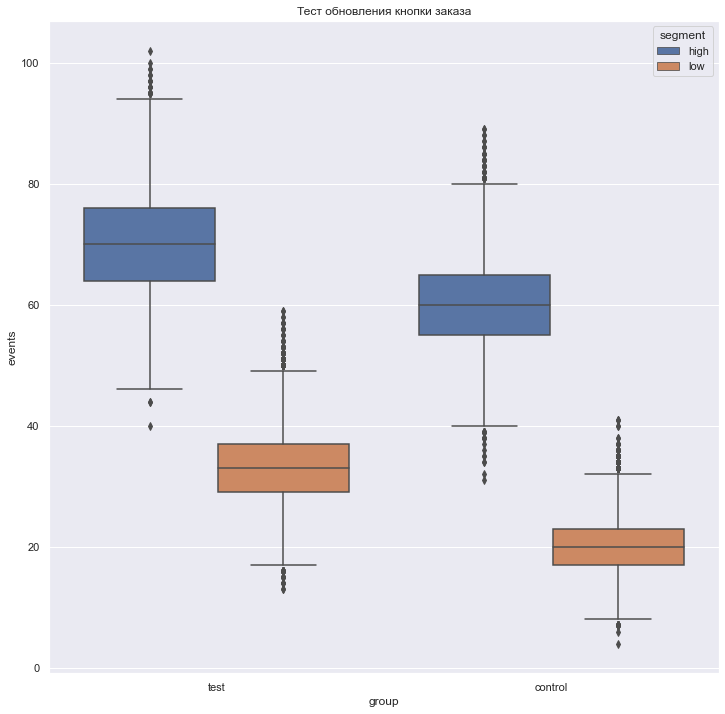

In [132]:
sns.boxplot(x = 'group', y = 'events', hue = 'segment', data = df1)
plt.title('Тест обновления кнопки заказа')
plt.xlabel('group')
plt.ylabel('events')
plt.legend(title = 'segment')

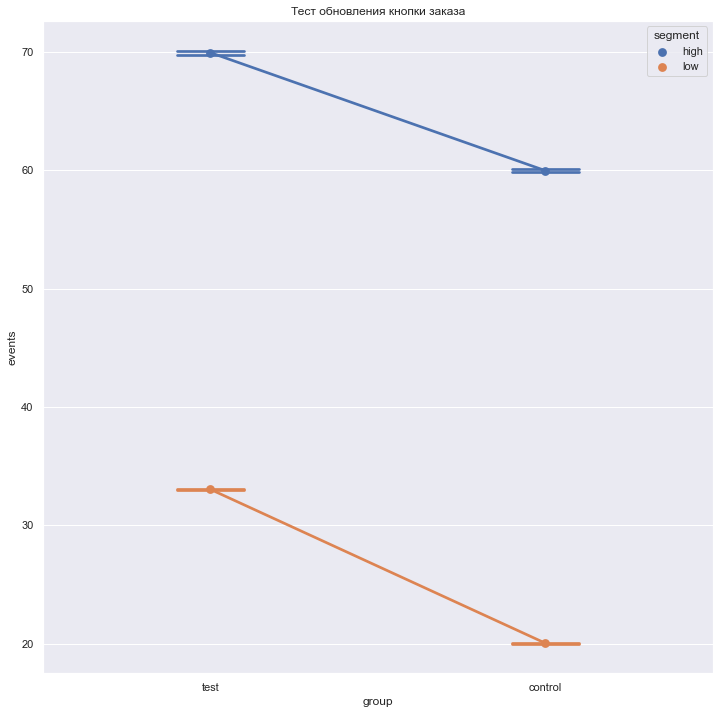

In [128]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df1, capsize = .2)
plt.title('Тест обновления кнопки заказа')
plt.xlabel('group')
plt.ylabel('events')
plt.legend(title = 'segment')

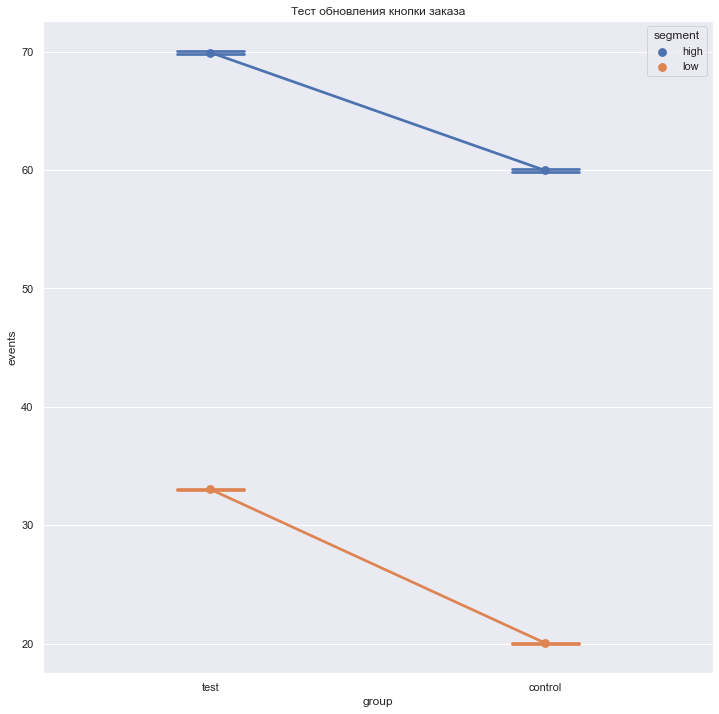

In [131]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df1, capsize = .2)
plt.title('Тест обновления кнопки заказа')
plt.xlabel('group')
plt.ylabel('events')
plt.legend(title = 'segment')